<a href="https://colab.research.google.com/github/20220701017/bitcoin-Prediction/blob/main/bitcoin_predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [ ]:

import pandas as pd
file_path = 'Bitcoin.csv'

df = pd.read_csv(file_path)

print(df.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


In [ ]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 2683
Number of columns: 7


In [ ]:

print(df.dtypes)
print(df.count())

memory_usage = df.memory_usage(index=True, deep=True).sum() / (1024 * 1024)
print("Memory Usage (MB):", memory_usage)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Date         2683
Open         2683
High         2683
Low          2683
Close        2683
Adj Close    2683
Volume       2683
dtype: int64
Memory Usage (MB): 0.2943735122680664


eda

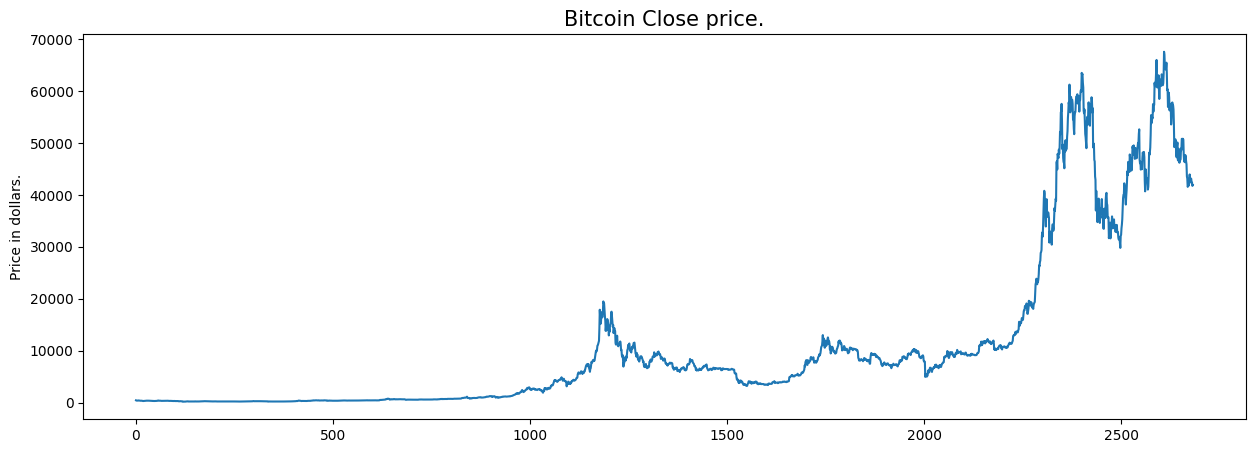

In [ ]:

import matplotlib.pyplot as plt

close_price = df['Close']

plt.figure(figsize=(15, 5))
plt.plot(close_price)
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [ ]:

equal_close_adj_close = df[df['Close'] == df['Adj Close']]

df_shape = df.shape

print("Number of rows where 'Close' price is equal to 'Adj Close' price:", equal_close_adj_close.shape[0])
print("Shape of the DataFrame:", df_shape)


Number of rows where 'Close' price is equal to 'Adj Close' price: 2683
Shape of the DataFrame: (2683, 7)


In [ ]:

df = df.drop(columns=['Adj Close'])
print(df.head())


         Date        Open        High         Low       Close    Volume
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100


In [ ]:

missing_values_count = df.isnull().sum()

print(missing_values_count)


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


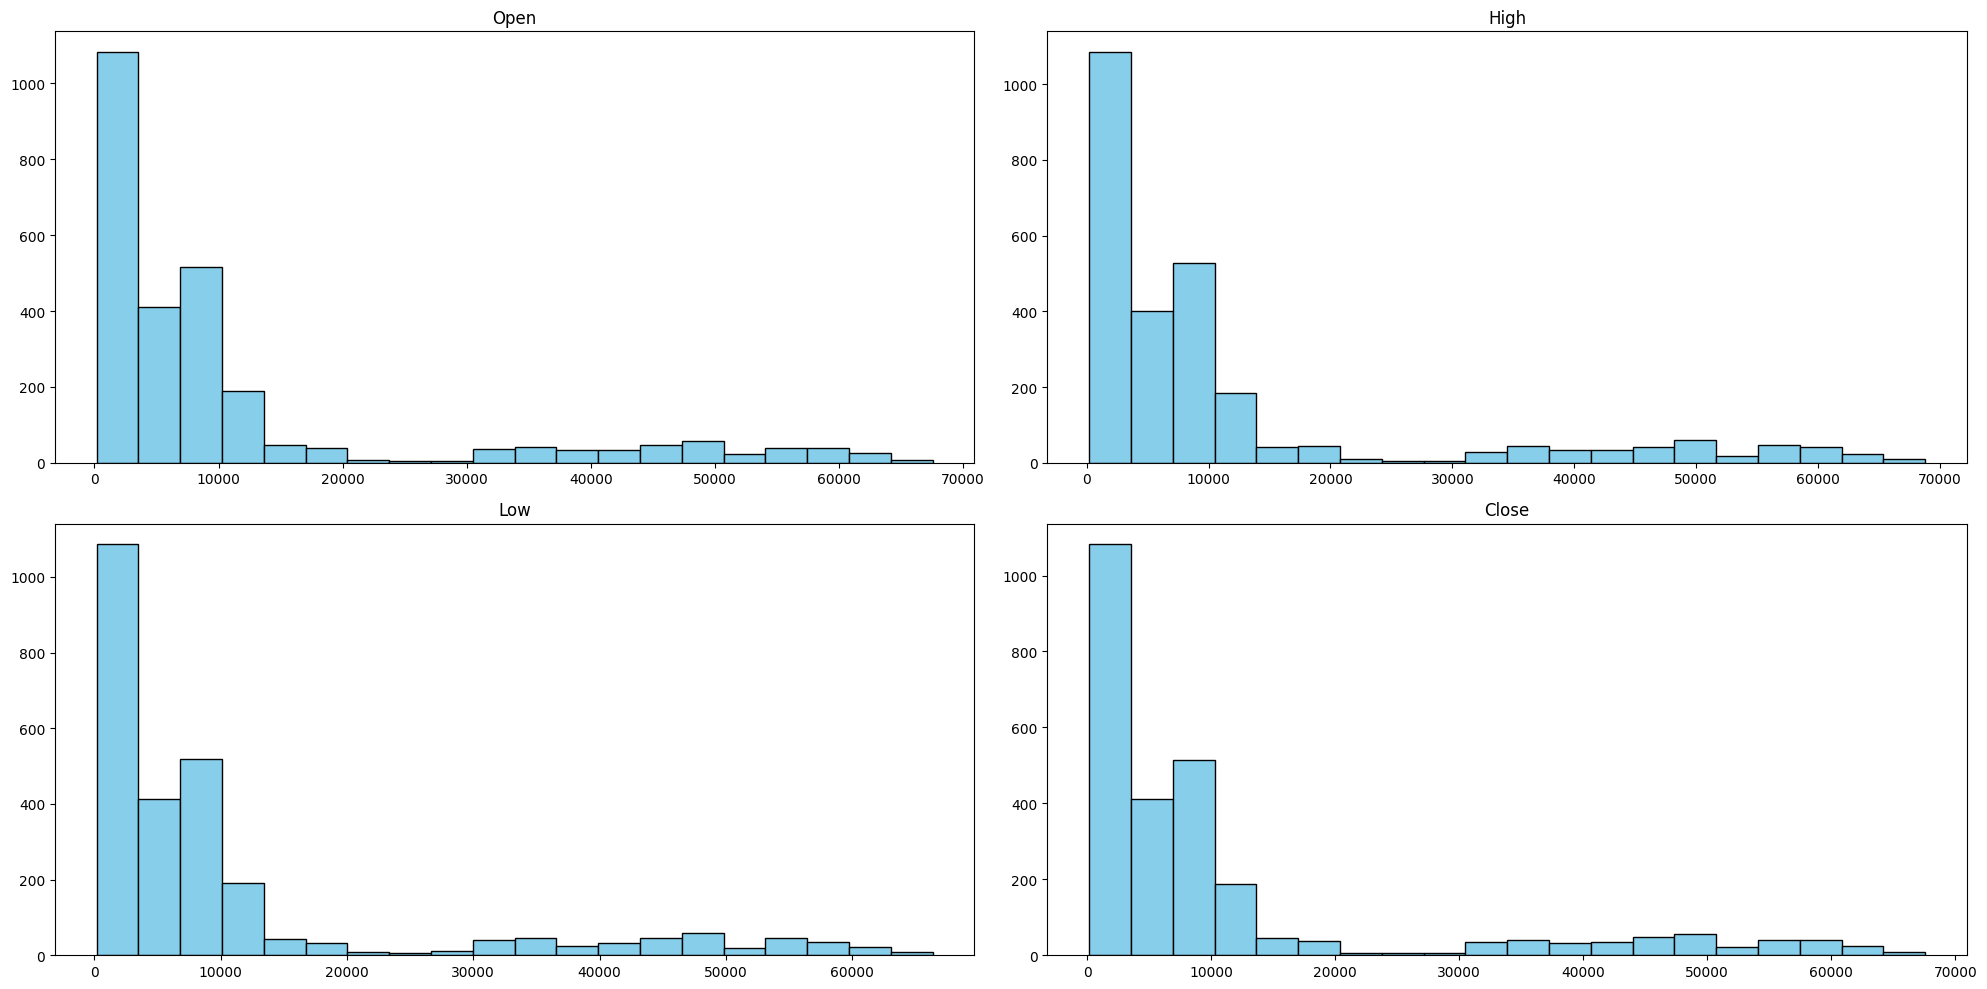

In [ ]:
import matplotlib.pyplot as plt


features = ['Open', 'High', 'Low', 'Close']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))


axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]  # Select the current axis
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)


plt.tight_layout()
plt.show()


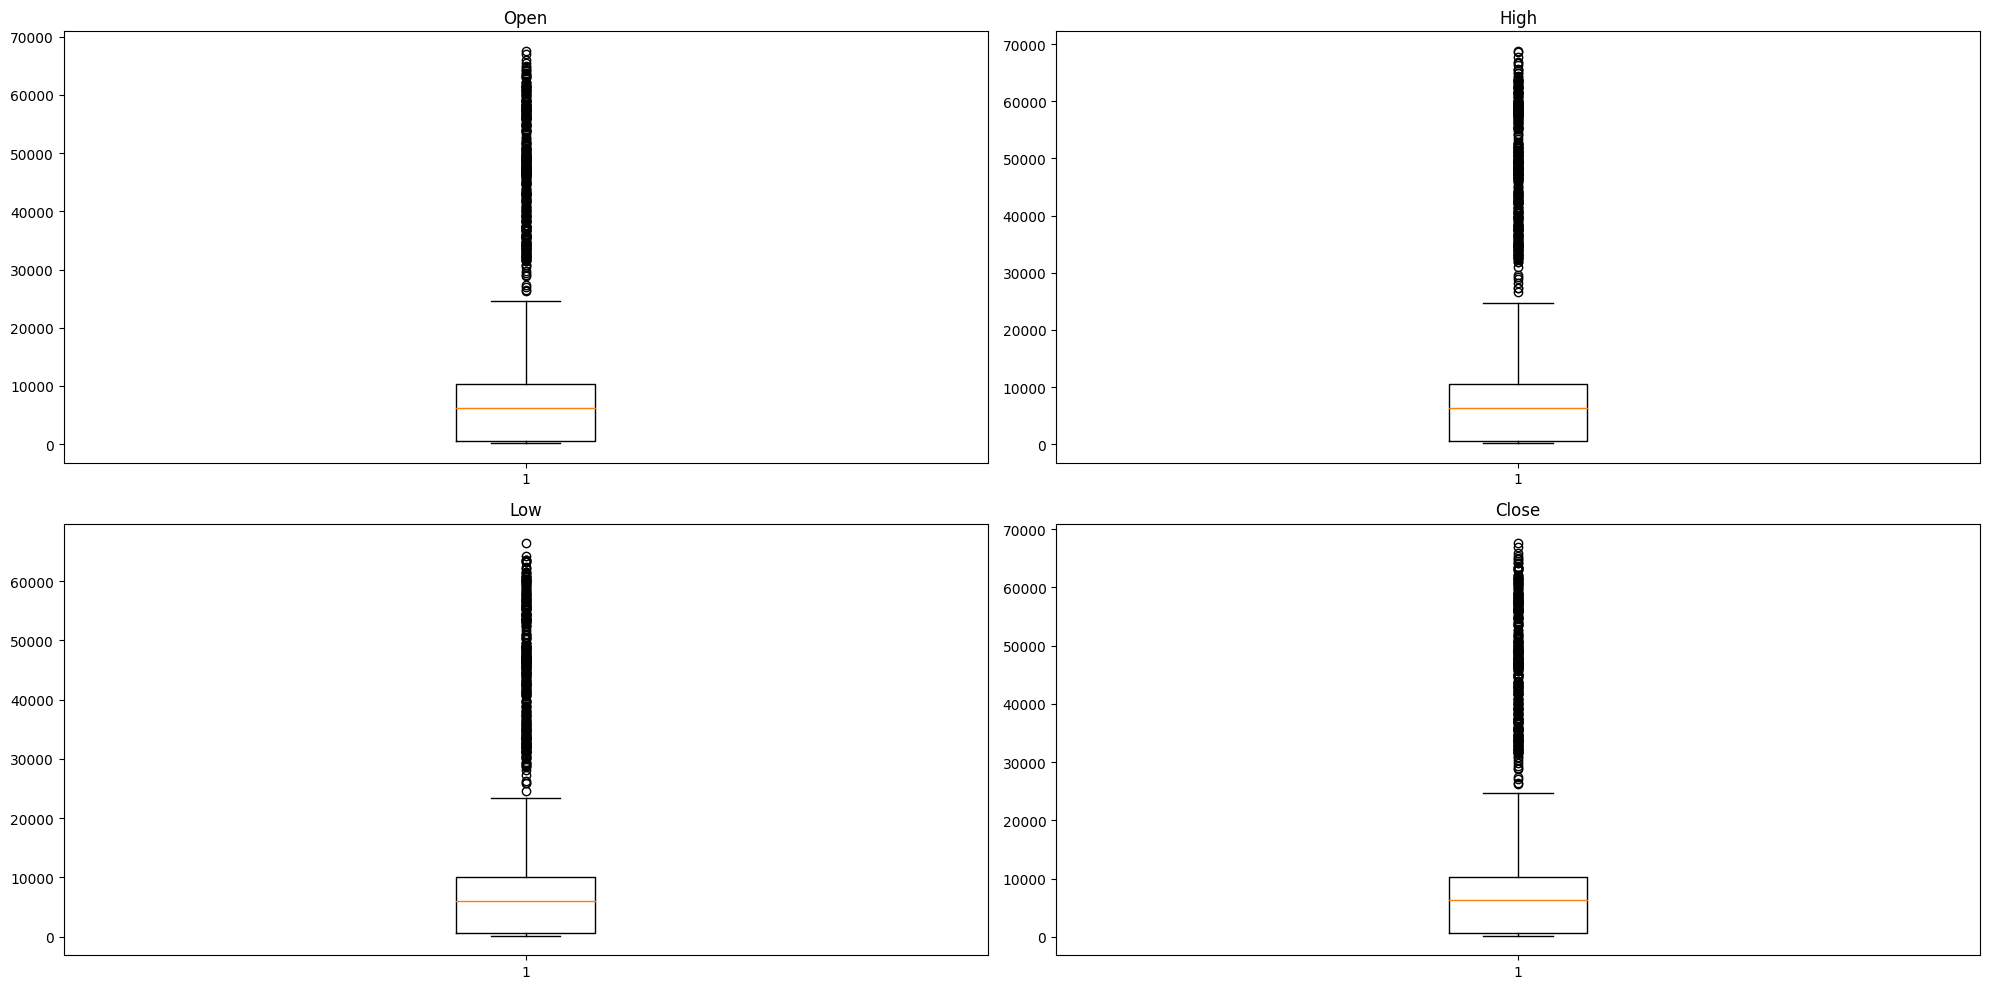

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]  # Select the current axis
    ax.boxplot(df[col])  # Plot boxplot
    ax.set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

print(df.head())


        Date        Open        High         Low       Close    Volume  year  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800  2014   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200  2014   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700  2014   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600  2014   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100  2014   

   month  day  
0      9   17  
1      9   18  
2      9   19  
3      9   20  
4      9   21  


<ipython-input-47-91cd0b0f7c40>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('year').mean()
<ipython-input-47-91cd0b0f7c40>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


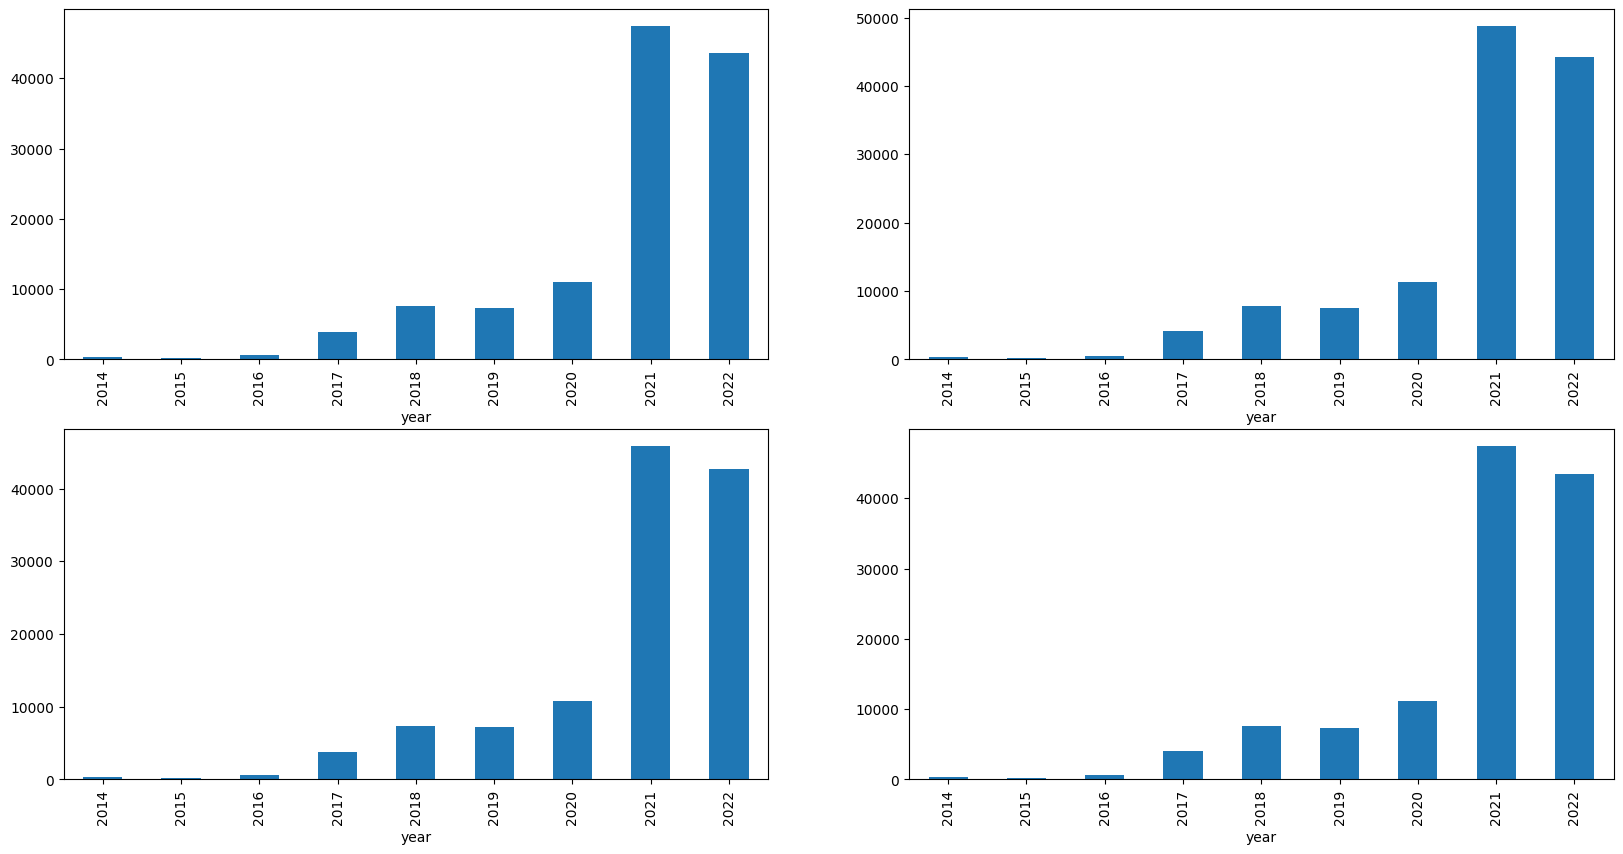

In [ ]:
import matplotlib.pyplot as plt

data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


Feature Engineering

In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


<ipython-input-27-91cd0b0f7c40>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('year').mean()
<ipython-input-27-91cd0b0f7c40>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


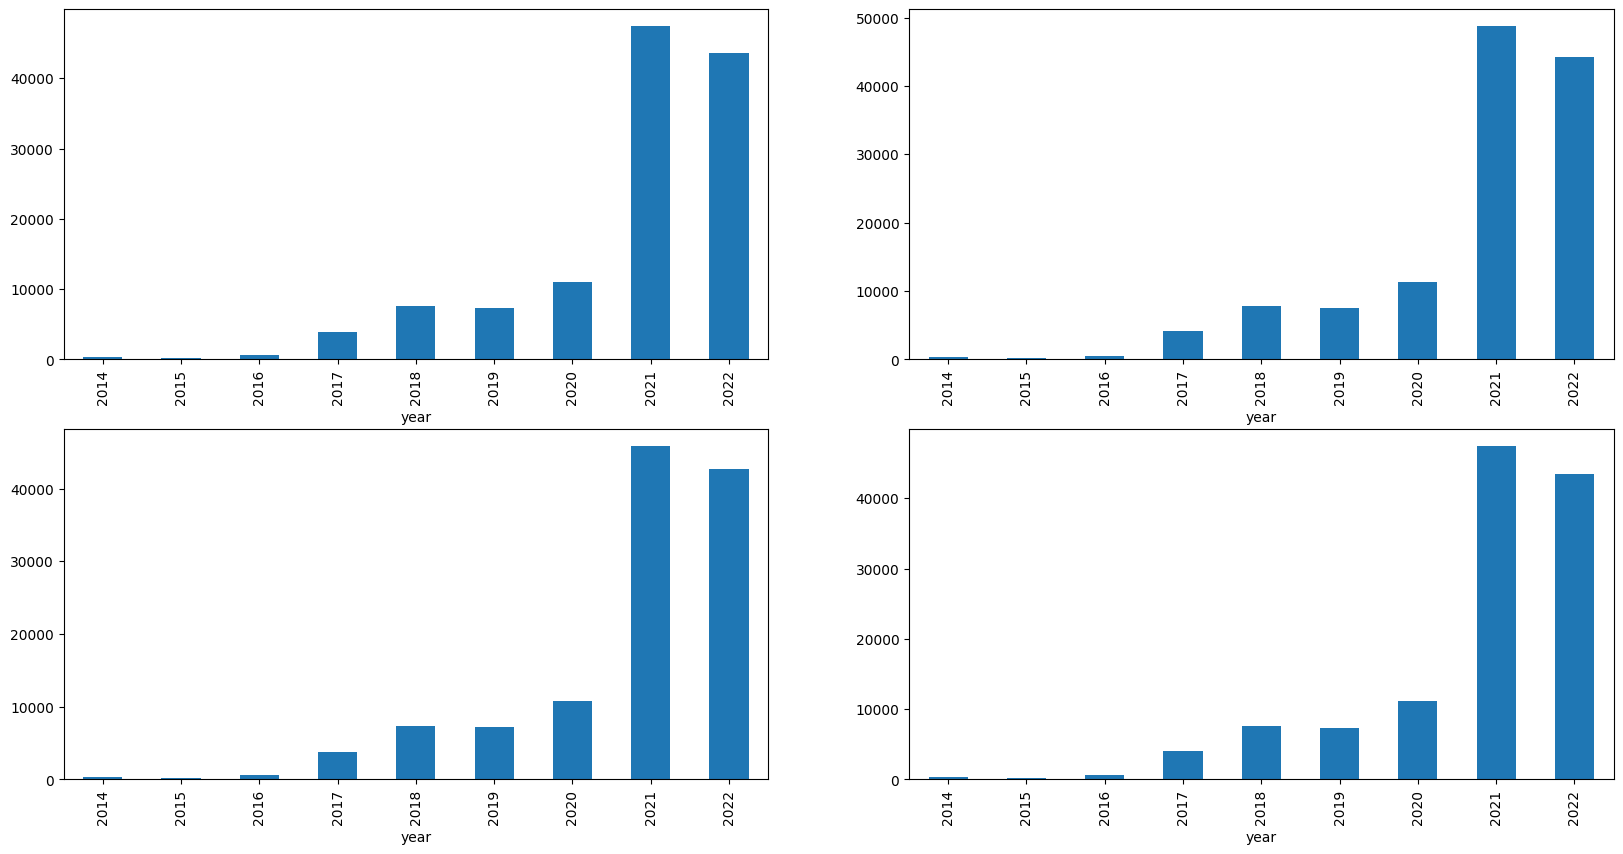

In [ ]:
import matplotlib.pyplot as plt

data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


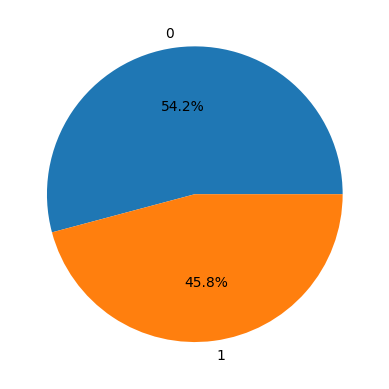

In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


<ipython-input-31-fbba8d4d60f6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)


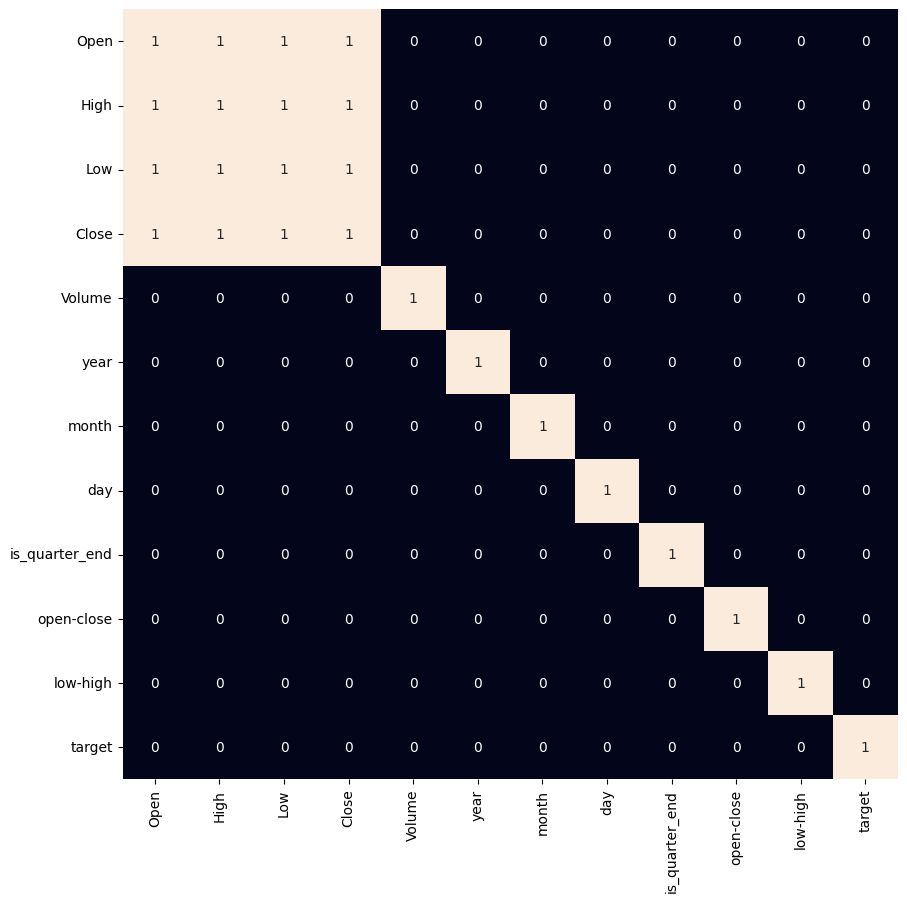

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2414, 3) (269, 3)


Model Development and Evaluation

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5251799951412355
Validation Accuracy :  0.5395814376706096

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.47457982729300563
Validation Accuracy :  0.5041515013648772

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'features' is your DataFrame containing features and 'target' is your target column
X = low
y = high

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


NameError: name 'low' is not defined